# Solutions to Exercises

For each exercise, the solutions below show one possible way of solving it, but you might have used a different approach, and that's great! There is almost always more than one way to solve any particular problem in Python.

**Note**: To run this notebook, you'll need to either a) move it up one level, out of the `solutions` folder to the main `pydata-intro-workshop` folder, or b) adjust the file paths in the code below (e.g., change `'data/weather_yxe.csv'` to `'../data/weather_yxe.csv'`).

## Initial Setup

In [1]:
import pandas as pd

%matplotlib inline

---

## Exercise 1

1.a) Read data for Saskatoon Airport from `'data/weather_yxe.csv'` into a new variable `weather_yxe` and display the first 7 rows.

In [2]:
weather_yxe = pd.read_csv('data/weather_yxe.csv')
weather_yxe.head(7)

,Datetime,Hour of Day,Conditions,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind Chill (C)
0,2018-05-21 23:00:00,23,Partly Cloudy,17.6,45.0,6.0,NaN,100.9,24.0,NE,17.0,NaN
1,2018-05-22 00:00:00,0,Mainly Clear,16.0,52.0,6.0,NaN,101.0,24.0,ENE,10.0,NaN
2,2018-05-22 01:00:00,1,Mainly Clear,13.1,61.0,6.0,NaN,101.0,24.0,NNE,11.0,NaN
3,2018-05-22 02:00:00,2,Mainly Clear,12.3,66.0,6.0,NaN,101.0,24.0,N,11.0,NaN
4,2018-05-22 03:00:00,3,Mainly Clear,12.3,70.0,7.0,NaN,101.1,24.0,NNE,16.0,NaN
5,2018-05-22 04:00:00,4,Mainly Clear,12.2,76.0,8.0,NaN,101.1,24.0,NNE,16.0,NaN
6,2018-05-22 05:00:00,5,Partly Cloudy,12.1,79.0,9.0,NaN,101.1,24.0,ENE,16.0,NaN


- Note the strange value `NaN` in the `'Humidex (C)'` and `'Wind Chill (C)'` columns. If you look at the data file in the CSV viewer, you will see that they correspond with blank cells in the table. `NaN` stands for "not a number" and is the value `pandas` uses for any missing data.

1.b) How many rows and columns does `weather_yxe` have? 

In [3]:
weather_yxe.shape

(24, 12)

- The DataFrame has 24 rows and 12 columns

1.c) What are the names and data types of the columns?

In [4]:
weather_yxe.dtypes

Datetime                  object
Hour of Day                int64
Conditions                object
Temperature (C)          float64
Relative Humidity (%)    float64
Dew Point (C)            float64
Humidex (C)              float64
Pressure (kPa)           float64
Visibility (km)          float64
Wind Direction            object
Wind Speed (km/hr)       float64
Wind Chill (C)           float64
dtype: object

- `Datetime`, `Condition`, and `Wind Direction` are type `object` (string)
- `Hour of Day` is integer
- The remaining columns are floats

1.d) What are the minimum and maximum relative humidity in this data?

- We can either use `max` and `min`, or use `describe` to display both min and max (among other statistics). With either approach, we can look up the relevant numbers from the output that is displayed. Here's the `min` and `max` version:

In [5]:
weather_yxe.min()

Datetime                 2018-05-21 23:00:00
Hour of Day                                0
Conditions                      Mainly Clear
Temperature (C)                         12.1
Relative Humidity (%)                     23
Dew Point (C)                              4
Humidex (C)                               24
Pressure (kPa)                         100.9
Visibility (km)                           19
Wind Speed (km/hr)                         0
Wind Chill (C)                           NaN
dtype: object

In [6]:
weather_yxe.max()

Datetime                                 2018-05-22 22:00:00
Hour of Day                                               23
Conditions               Thunderstorm with light rainshowers
Temperature (C)                                         26.6
Relative Humidity (%)                                     79
Dew Point (C)                                             11
Humidex (C)                                               24
Pressure (kPa)                                         101.5
Visibility (km)                                           24
Wind Speed (km/hr)                                        20
Wind Chill (C)                                           NaN
dtype: object

- The minimum relative humidity is 23% and the maximum is 79%.

#### Bonus exercises

1.e) What is the mean wind speed during the first 8 hours (first 8 rows) of data?

- We can assign the output of `weather_yxe.head(8)` to a new variable `first_eight`, and then apply the `mean` method to `first_eight`:

In [7]:
first_eight = weather_yxe.head(8)
first_eight.mean()

Hour of Day                5.500
Temperature (C)           13.850
Relative Humidity (%)     64.750
Dew Point (C)              7.250
Humidex (C)                  NaN
Pressure (kPa)           101.050
Visibility (km)           23.375
Wind Speed (km/hr)        14.625
Wind Chill (C)               NaN
dtype: float64

- The mean wind speed in the first 8 hours is 14.625 km/hr.

1.f) What are the minimum and maximum relative humidity during the last 10 hours of data?

- We can use the `min` and `max` methods, or use `describe` to display both at once. We could create a new variable `last_ten = weather_yxe.tail(10)`, as in the previous example, or we can skip that step and "chain" the methods together:

In [8]:
weather_yxe.tail(10).describe()

,Hour of Day,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Speed (km/hr),Wind Chill (C)
count,10.00000,10.000000,10.000000,10.000000,1.0,10.000000,10.0,10.000000,0.0
mean,17.50000,24.040000,31.700000,6.000000,24.0,101.410000,24.0,9.700000,NaN
std,3.02765,3.320375,8.654479,1.154701,NaN,0.056765,0.0,4.498148,NaN
min,13.00000,16.500000,23.000000,4.000000,24.0,101.300000,24.0,0.000000,NaN
25%,15.25000,23.650000,25.500000,5.250000,24.0,101.400000,24.0,7.250000,NaN
50%,17.50000,25.250000,29.000000,6.000000,24.0,101.400000,24.0,11.000000,NaN
75%,19.75000,26.250000,34.250000,6.750000,24.0,101.400000,24.0,13.000000,NaN
max,22.00000,26.600000,51.000000,8.000000,24.0,101.500000,24.0,14.000000,NaN


- The minimum and maximum relative humidity during the last 10 hours are 23% and 51%, respectively.

1.g) Display summary statistics for all columns for a random sampling of 12 hours of data.

- Since the `sample` method gives a different random sampling each time, the numbers will be different in your output compared to the example solution below.

In [9]:
weather_yxe.sample(12).describe()

,Hour of Day,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Speed (km/hr),Wind Chill (C)
count,12.000000,12.000000,12.000000,12.000000,1.0,12.000000,12.000000,12.000000,0.0
mean,12.333333,20.083333,46.833333,7.000000,24.0,101.291667,23.583333,11.583333,NaN
std,7.364946,6.215206,22.073568,2.044949,NaN,0.150504,1.443376,5.230302,NaN
min,1.000000,12.200000,23.000000,4.000000,24.0,101.000000,19.000000,0.000000,NaN
25%,5.500000,13.925000,26.500000,5.750000,24.0,101.175000,24.000000,9.500000,NaN
50%,15.500000,21.700000,38.000000,7.000000,24.0,101.400000,24.000000,12.500000,NaN
75%,18.250000,26.150000,69.250000,8.000000,24.0,101.400000,24.000000,14.500000,NaN
max,21.000000,26.600000,78.000000,11.000000,24.0,101.400000,24.000000,20.000000,NaN


---

## Exercise 2

##### Initial setup

The code below initializes the variable `weather_yvr` in this notebook to match what you would have in your `Workshop.ipynb` notebook at this point during the lesson (with an extra column for fractional relative humidity):

In [10]:
weather_yvr = pd.read_csv('data/weather_yvr.csv')
weather_yvr['Relative Humidity (fraction)'] = weather_yvr['Relative Humidity (%)'] / 100

2.a) Add a column to your `weather_yvr` DataFrame which has the temperature in degrees Fahrenheit (to convert from Celsius to Fahrenheit, multiply the temperature in degrees C by 1.8 and add 32)

In [11]:
weather_yvr['Temperature (F)'] = 1.8 * weather_yvr['Temperature (C)'] + 32
weather_yvr.head()

,Datetime,Hour of Day,Conditions,Temperature (C),Relative Humidity (%),Relative Humidity (fraction),Temperature (F)
0,2018-05-21 22:00:00,22,Mainly Clear,14.8,75.0,0.75,58.64
1,2018-05-21 23:00:00,23,Clear,13.5,76.0,0.76,56.30
2,2018-05-22 00:00:00,0,Clear,13.1,77.0,0.77,55.58
3,2018-05-22 01:00:00,1,Clear,12.9,84.0,0.84,55.22
4,2018-05-22 02:00:00,2,Clear,12.2,88.0,0.88,53.96


2.b) Save the DataFrame with this extra column to a new CSV file

In [12]:
weather_yvr.to_csv('data/weather_yvr_extra2.csv', index=False)

2.c) Create a line plot of the temperature in degrees Fahrenheit

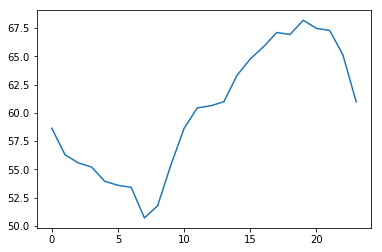

In [13]:
weather_yvr['Temperature (F)'].plot();

#### Bonus exercises

2.d) Work through the examples in the extra section "Timeseries Data" of Lesson 2

2.e) Create a plot of the YVR temperature in Fahrenheit with the date and time as the x-axis, and figure size of 8" wide by 5" tall

- There are a couple of ways of approaching this problem. One option is to use our existing `weather_yvr` variable, which already has a Fahrenheit temperature column, convert the `'Datetime'` column to `datetime` data type, and set the `'Datetime'` column as the index:

In [14]:
# First create a new DataFrame which is a copy of weather_yvr
#  Alternatively, you could modify the weather_yvr DataFrame directly, but then if you re-ran
#  any of the previous cells in this notebook you would get very different output, so it would 
#  be confusing.
weather_yvr_dt = weather_yvr.copy()

# Convert the 'Datetime' column to datetime format
weather_yvr_dt['Datetime'] = pd.to_datetime(weather_yvr_dt['Datetime'])

# Set the 'Datetime' column as the index
weather_yvr_dt = weather_yvr_dt.set_index('Datetime')
weather_yvr_dt.head()

,Hour of Day,Conditions,Temperature (C),Relative Humidity (%),Relative Humidity (fraction),Temperature (F)
Datetime,,,,,,
2018-05-21 22:00:00,22,Mainly Clear,14.8,75.0,0.75,58.64
2018-05-21 23:00:00,23,Clear,13.5,76.0,0.76,56.30
2018-05-22 00:00:00,0,Clear,13.1,77.0,0.77,55.58
2018-05-22 01:00:00,1,Clear,12.9,84.0,0.84,55.22
2018-05-22 02:00:00,2,Clear,12.2,88.0,0.88,53.96


- Alternatively, you could re-read the CSV file using the `index_col` and `parse_dates` keyword arguments, and then add the Fahrenheit temperature column:

```
weather_yvr_dt = pd.read_csv('data/weather_yvr.csv', index_col=0, parse_dates=True)
weather_yvr_dt['Temperature (F)'] = 1.8 * weather_yvr_dt['Temperature (C)'] + 32
weather_yvr_dt.head()
```

- Plot the timeseries:

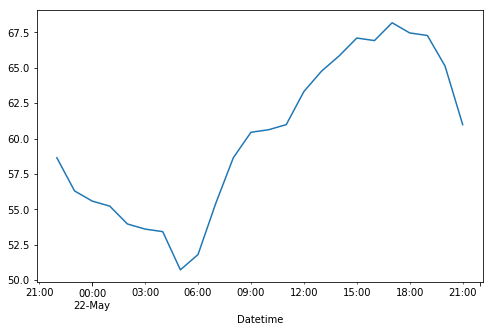

In [15]:
weather_yvr_dt['Temperature (F)'].plot(figsize=(8, 5));

---

## Exercise 3

3.a) Familiarize yourself with the file `'data/weather_airport_stations.csv'` in the Jupyter Lab CSV viewer, and then read it into a new variable `weather_all`
- Display a random sampling of 10 rows
- How many rows and columns does the data have?
- What are the lowest and highest temperatures in the data?

In [16]:
weather_all = pd.read_csv('data/weather_airport_stations.csv')
weather_all.sample(10)

,Datetime,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind Chill (C)
209,2018-05-22 16:00,Canada/Central,16,YXE,Saskatoon Diefenbaker Int'l Airport,52.17,-106.70,Partly Cloudy,26.1,27.0,6.0,NaN,101.4,24.0,N,6.0,NaN
144,2018-05-21 23:00,Canada/Mountain,23,YEG,Edmonton Int'l Airport,53.31,-113.58,Partly Cloudy,16.0,50.0,6.0,NaN,101.2,24.0,NNE,6.0,NaN
107,2018-05-22 10:00,Canada/Mountain,10,YZF,Yellowknife Airport,62.46,-114.44,Mostly Cloudy,12.5,58.0,5.0,NaN,100.5,24.0,S,9.0,NaN
230,2018-05-22 13:00,Canada/Central,13,YQR,Regina Int'l Airport,50.43,-104.67,Mostly Cloudy,27.3,26.0,6.0,NaN,101.2,24.0,NW,5.0,NaN
458,2018-05-22 4:30,Canada/Newfoundland,4,YYT,St. John's Int'l Airport,47.62,-52.75,Mainly Clear,3.6,92.0,3.0,NaN,100.7,24.0,W,26.0,NaN
114,2018-05-22 17:00,Canada/Mountain,17,YZF,Yellowknife Airport,62.46,-114.44,Mostly Cloudy,23.1,30.0,5.0,NaN,100.4,24.0,SSW,16.0,NaN
315,2018-05-22 4:00,Canada/Eastern,4,YOW,Ottawa Macdonald-Cartier Int'l Airport,45.32,-75.67,Mostly Cloudy,12.3,73.0,8.0,NaN,101.9,24.0,S,10.0,NaN
196,2018-05-22 3:00,Canada/Central,3,YXE,Saskatoon Diefenbaker Int'l Airport,52.17,-106.70,Mainly Clear,12.3,70.0,7.0,NaN,101.1,24.0,NNE,16.0,NaN
436,2018-05-22 6:00,Canada/Atlantic,6,YYG,Charlottetown Airport,46.29,-63.12,Mainly Sunny,0.2,96.0,-1.0,NaN,102.2,24.0,N,2.0,*
322,2018-05-22 11:00,Canada/Eastern,11,YOW,Ottawa Macdonald-Cartier Int'l Airport,45.32,-75.67,Mostly Cloudy,16.9,62.0,10.0,NaN,101.7,24.0,S,8.0,NaN


In [17]:
weather_all.shape

(480, 17)

- The data has 480 rows and 17 columns.

To find the lowest and highest temperatures, we can use the `describe` method on the `'Temperature (C)'` column:

In [18]:
weather_all['Temperature (C)'].describe()

count    479.000000
mean      13.974530
std        7.892156
min       -7.100000
25%       10.000000
50%       14.400000
75%       19.150000
max       28.600000
Name: Temperature (C), dtype: float64

- The lowest temperature is -7.1 C and the highest is 28.6 C:

Alternatively, we could use the `min` and `max` methods on the `'Temperature (C)'` column to return only the numbers we're looking for:

In [19]:
weather_all['Temperature (C)'].min()

-7.1

In [20]:
weather_all['Temperature (C)'].max()

28.6

3.b) How many unique Station Names and Datetimes are in the data? List the unique values.

In [21]:
# Using the nunique method
weather_all['Station Name'].nunique()

20

- There are 20 unique station names, listed below:

In [22]:
weather_all['Station Name'].unique()

array(["Vancouver Int'l Airport", "Victoria Int'l Airport",
       'Prince George Airport', 'Whitehorse Airport',
       'Yellowknife Airport', 'Iqaluit Airport', "Edmonton Int'l Airport",
       "Calgary Int'l Airport", "Saskatoon Diefenbaker Int'l Airport",
       "Regina Int'l Airport", "Winnipeg Richardson Int'l Airport",
       'Thunder Bay Airport', "Toronto Pearson Int'l Airport",
       "Ottawa Macdonald-Cartier Int'l Airport",
       "Montreal-Trudeau Int'l Airport", "Quebec Lesage Int'l Airport",
       "Fredericton Int'l Airport", "Halifax Stanfield Int'l Airport",
       'Charlottetown Airport', "St. John's Int'l Airport"], dtype=object)

In [23]:
# Using the unique method and len function
datetimes_unique = weather_all['Datetime'].unique()
len(datetimes_unique)

52

- There are 52 unique datetimes, listed below:

In [24]:
datetimes_unique

array(['2018-05-21 22:00', '2018-05-21 23:00', '2018-05-22 0:00',
       '2018-05-22 1:00', '2018-05-22 2:00', '2018-05-22 3:00',
       '2018-05-22 4:00', '2018-05-22 5:00', '2018-05-22 6:00',
       '2018-05-22 7:00', '2018-05-22 8:00', '2018-05-22 9:00',
       '2018-05-22 10:00', '2018-05-22 11:00', '2018-05-22 12:00',
       '2018-05-22 13:00', '2018-05-22 14:00', '2018-05-22 15:00',
       '2018-05-22 16:00', '2018-05-22 17:00', '2018-05-22 18:00',
       '2018-05-22 19:00', '2018-05-22 20:00', '2018-05-22 21:00',
       '2018-05-22 22:00', '2018-05-22 23:00', '2018-05-23 0:00',
       '2018-05-23 1:00', '2018-05-22 2:30', '2018-05-22 3:30',
       '2018-05-22 4:30', '2018-05-22 5:30', '2018-05-22 6:30',
       '2018-05-22 7:30', '2018-05-22 8:30', '2018-05-22 9:30',
       '2018-05-22 10:30', '2018-05-22 11:30', '2018-05-22 12:30',
       '2018-05-22 13:30', '2018-05-22 14:30', '2018-05-22 15:30',
       '2018-05-22 16:30', '2018-05-22 17:30', '2018-05-22 18:30',
       '2018-05

3.c) What are the three most common Conditions and the three most common Wind Directions?

- We can display the counts for all values with the `value_counts` method, and see which ones are top three:

In [25]:
weather_all['Conditions'].value_counts()

Mostly Cloudy                          148
Partly Cloudy                           90
Mainly Sunny                            48
Mainly Clear                            37
Clear                                   35
Sunny                                   34
Cloudy                                  31
Light Rain                              16
Light Snow                              15
Mist                                    11
Light Drizzle                            5
Light Rainshower                         4
Fog                                      4
Thunderstorm with light rainshowers      1
Name: Conditions, dtype: int64

- If we want to display *only* the top three, we can chain the `head` method:

In [26]:
weather_all['Conditions'].value_counts().head(3)

Mostly Cloudy    148
Partly Cloudy     90
Mainly Sunny      48
Name: Conditions, dtype: int64

In [27]:
weather_all['Wind Direction'].value_counts().head(3)

S      67
SSW    62
SSE    44
Name: Wind Direction, dtype: int64

- Three most common Conditions: Mostly Cloudy, Partly Cloudy, Mainly Sunny
- Three most common Wind Directions: S, SSW, SSE

3.d) Which column has the most missing values? How many are missing in this column?

In [28]:
weather_all.isnull().sum()

Datetime                   0
Timezone                   0
Hour of Day                0
Station ID                 0
Station Name               0
Latitude                   0
Longitude                  0
Conditions                 1
Temperature (C)            1
Relative Humidity (%)      1
Dew Point (C)              2
Humidex (C)              446
Pressure (kPa)             1
Visibility (km)            1
Wind Direction            14
Wind Speed (km/hr)         1
Wind Chill (C)           432
dtype: int64

- The 'Humidex (C)' column has the most missing values (446).

#### Bonus exercises

3.e) How many temperatures in `weather_all` are less than 0 and how many are greater than 20?
- *Hint: review the comparison operators in the "Booleans" section of Lesson 0*

In [29]:
# Assign the 'Temperature (C)' column to a variable
temp = weather_all['Temperature (C)']

In [30]:
# Use the comparison operator < to create a Series of Booleans
# representing whether a temperature is less than zero (True) or not (False)
temp_lt_0 = temp < 0
temp_lt_0.head()

0    False
1    False
2    False
3    False
4    False
Name: Temperature (C), dtype: bool

In [31]:
# Sum the Boolean values in the Series to obtain the total number of temperatures less than 0
temp_lt_0.sum()

25

- There are 25 temperatures less than 0 C.

In [32]:
# Boolean Series for temperature greather than 20
temp_gt_20 = temp > 20
temp_gt_20.head()

0    False
1    False
2    False
3    False
4    False
Name: Temperature (C), dtype: bool

In [33]:
# Calculate the total
temp_gt_20.sum()

107

- There are 107 temperatures greater than 20 C.

3.f) Work through the steps in the "Automating Tasks with Scripts" section in Lesson 3 to create and run a script in Jupyter Lab

---

## Exercise 4

4.a) What is the fastest wind speed in `weather_all`, and at what station and datetime did it occur? What were the wind direction, temperature, and weather conditions (raining / sunny / etc.) that accompanied this fastest wind speed?

In [34]:
weather_all.sort_values('Wind Speed (km/hr)', ascending=False).head(1)

,Datetime,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind Chill (C)
138,2018-05-22 19:00,Canada/Eastern,19,YFB,Iqaluit Airport,63.76,-68.56,Partly Cloudy,-4.0,84.0,-6.0,NaN,100.8,32.0,NNW,54.0,-14


- The fastest wind speed was 54 km/hr at Iqaluit Airport at 2018-05-22 19:00. Wind direction was NNW, temperature -4 C, and weather conditions partly cloudy.

If we only wanted to display the specific information we're interested in, we could extract a subset of columns:

In [35]:
columns = ['Datetime', 'Station Name', 'Wind Direction', 'Wind Speed (km/hr)', 
           'Temperature (C)', 'Conditions']
weather_all[columns].sort_values('Wind Speed (km/hr)', ascending=False).head(1)

,Datetime,Station Name,Wind Direction,Wind Speed (km/hr),Temperature (C),Conditions
138,2018-05-22 19:00,Iqaluit Airport,NNW,54.0,-4.0,Partly Cloudy


4.b) How many stations had wind speeds greater than 30 km/hr? Which stations were they?

In [36]:
# Create a filter and fill any missings
windy = weather_all['Wind Speed (km/hr)'] > 30
windy = windy.fillna(False)

# Use the filter to extract the desired rows from our DataFrame
weather_windy = weather_all[windy]
weather_windy.head()

,Datetime,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind Chill (C)
92,2018-05-22 18:00,Canada/Pacific,18,YXY,Whitehorse Airport,60.71,-135.07,Mostly Cloudy,12.2,37.0,-2.0,NaN,100.8,64.0,S,42.0,NaN
100,2018-05-22 3:00,Canada/Mountain,3,YZF,Yellowknife Airport,62.46,-114.44,Mostly Cloudy,14.4,45.0,3.0,NaN,100.5,24.0,SSE,31.0,NaN
128,2018-05-22 9:00,Canada/Eastern,9,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.5,78.0,-10.0,NaN,101.0,10.0,NNW,31.0,-15
130,2018-05-22 11:00,Canada/Eastern,11,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-5.0,78.0,-8.0,NaN,100.9,10.0,NNW,36.0,-14
131,2018-05-22 12:00,Canada/Eastern,12,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-4.7,78.0,-8.0,NaN,100.9,10.0,NNW,35.0,-13


In [37]:
windy_stations = weather_windy['Station Name'].unique()
windy_stations

array(['Whitehorse Airport', 'Yellowknife Airport', 'Iqaluit Airport',
       "Quebec Lesage Int'l Airport", "Fredericton Int'l Airport",
       "Halifax Stanfield Int'l Airport", 'Charlottetown Airport',
       "St. John's Int'l Airport"], dtype=object)

In [38]:
len(windy_stations)

8

- There were 8 stations with wind speeds greater than 30 km/hr: Whitehorse, Yellowknife, Iqaluit, Quebec, Fredericton, Halifax, Charlottetown, and St. John's.

#### Bonus exercises

4.c) What were the top three windiest stations, based on their maximum wind speeds? What were the maximum wind speeds at each of these stations?

In [39]:
columns_wind = ['Station Name', 'Wind Speed (km/hr)'] 
winds_max = weather_all[columns_wind].groupby('Station Name').max()
winds_max.sort_values('Wind Speed (km/hr)', ascending=False).head(3)

,Wind Speed (km/hr)
Station Name,
Iqaluit Airport,54.0
Whitehorse Airport,42.0
Quebec Lesage Int'l Airport,39.0


- Top 3 windiest stations and their maximum wind speeds:
  - 1) Iqaluit: 54 km/hr
  - 2) Whitehorse: 42 km/hr
  - 3) Quebec Lesage: 39 km/hr

4.d) Do the top three stations from (c) change if you rank your stations based on mean wind speed instead of maximum wind speed?

In [40]:
winds_mean = weather_all[columns_wind].groupby('Station Name').mean()
winds_mean.sort_values('Wind Speed (km/hr)', ascending=False).head(3)

,Wind Speed (km/hr)
Station Name,
Iqaluit Airport,31.708333
St. John's Int'l Airport,23.500000
Whitehorse Airport,18.875000


- Yes, the 2nd and 3rd place rankings change. The top 3 windiest stations based on mean wind speed:
  - 1) Iqaluit: 31.7 km/hr
  - 2) St. John's: 23.5
  - 3) Whitehorse: 18.9 km/hr